## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data=pd.read_csv('/content/drugsCom_raw.tsv',sep='\t',on_bad_lines="warn",engine="python")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [4]:
data.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1


In [5]:
data["condition"].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [6]:
len(data["condition"].unique())

885

In [7]:
data["condition"].value_counts()

,count
condition,
Birth Control,28788
Depression,9069
Pain,6145
Anxiety,5904
Acne,5588
...,...
Dissociative Identity Disorde,1
Hydrocephalus,1
"Hyperlipoproteinemia Type III, Elevated beta-VLDL IDL",1


In [8]:
main_data=data[(data['condition']=="Depression") | (data['condition']=="High Blood Pressure") | (data['condition']=="Diabetes, Type 2")]

In [9]:
main_data.reset_index(drop=True,inplace=True)

In [10]:
main_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
1,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
2,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
3,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
4,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166


In [11]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13944 non-null  int64  
 1   drugName     13944 non-null  object 
 2   condition    13944 non-null  object 
 3   review       13944 non-null  object 
 4   rating       13944 non-null  float64
 5   date         13944 non-null  object 
 6   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 762.7+ KB


In [12]:
len(main_data["drugName"].unique())

334

In [13]:
main_data["drugName"].value_counts()

,count
drugName,
Bupropion,549
Sertraline,459
Venlafaxine,437
Pristiq,418
Desvenlafaxine,414
...,...
Insulin aspart / insulin aspart protamine,1
Tarka,1
Exforge HCT,1


In [14]:
 main_data.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


In [15]:
main_data[main_data.duplicated(keep=False)]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount


In [16]:
main_data.drop_duplicates(keep="first",inplace=True)

In [17]:
main_data.reset_index(drop=True,inplace=True)

In [18]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13944 non-null  int64  
 1   drugName     13944 non-null  object 
 2   condition    13944 non-null  object 
 3   review       13944 non-null  object 
 4   rating       13944 non-null  float64
 5   date         13944 non-null  object 
 6   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 762.7+ KB


In [19]:
main_data.drop(["Unnamed: 0","date"],axis=1,inplace=True)

In [20]:
main_data

,drugName,condition,review,rating,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166
...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33


<Axes: ylabel='count'>

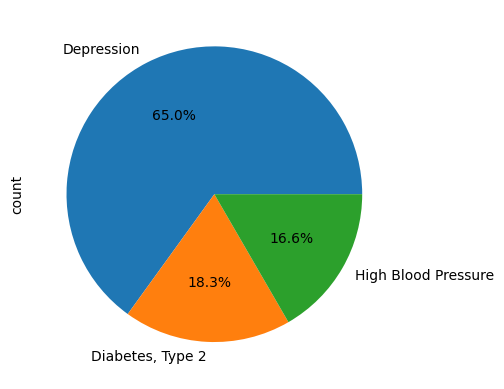

In [21]:
main_data["condition"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

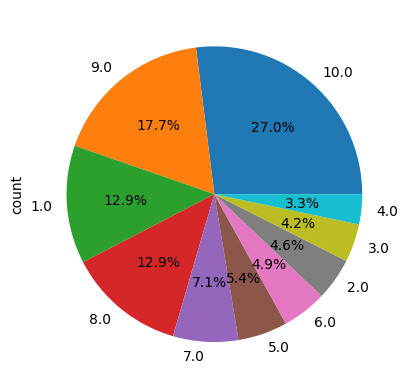

In [22]:
main_data["rating"].value_counts().plot(kind="pie",autopct="%1.1f%%")

### Detecting and Treating Anamolies

{'whiskers': [<matplotlib.lines.Line2D at 0x7a8e9c300040>,
 'caps': [<matplotlib.lines.Line2D at 0x7a8e9c300580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a8e9d216230>],
 'medians': [<matplotlib.lines.Line2D at 0x7a8e9c300ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a8e9c300d60>],
 'means': []}

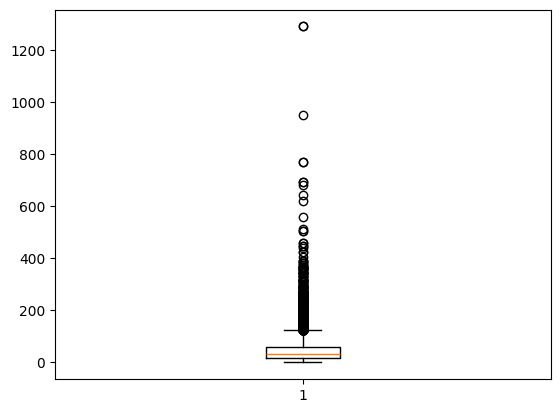

In [23]:
plt.boxplot(main_data["usefulCount"])

In [24]:
main_data["usefulCount"].describe()

,usefulCount
count,13944.000000
mean,45.737880
std,51.782627
min,0.000000
25%,16.000000
50%,31.000000
75%,59.000000
max,1291.000000


In [25]:
a=np.percentile(main_data.usefulCount,[99][0])

In [26]:
main_data.usefulCount[(main_data.usefulCount>3*a)].count()

5

In [27]:
main_data.usefulCount[(main_data.usefulCount>3*a)]=3*a

<Axes: xlabel='rating', ylabel='usefulCount'>

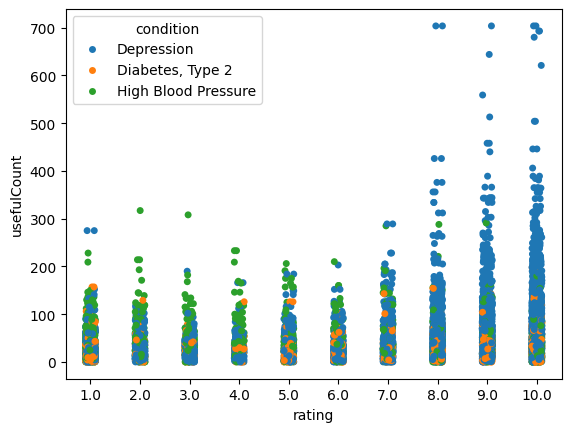

In [28]:
sns.stripplot(x="rating",y="usefulCount",data=main_data,hue="condition")

<Axes: xlabel='rating'>

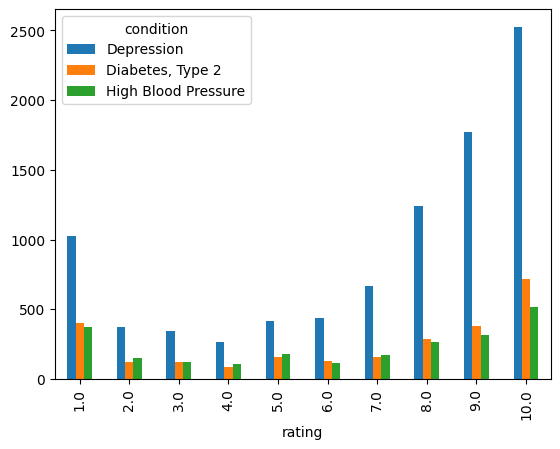

In [29]:
pd.crosstab(main_data.rating,main_data.condition).plot(kind="bar")

(array([6.8706e+04, 3.4865e+04, 1.9948e+04, 1.2270e+04, 7.7870e+03,
        5.4130e+03, 3.5430e+03, 2.3550e+03, 1.7390e+03, 1.2150e+03,
        8.4500e+02, 5.6100e+02, 4.6600e+02, 3.3600e+02, 2.7500e+02,
        1.8000e+02, 1.5500e+02, 1.1100e+02, 1.0300e+02, 6.1000e+01,
        6.2000e+01, 4.1000e+01, 4.1000e+01, 3.1000e+01, 3.3000e+01,
        2.2000e+01, 2.4000e+01, 1.1000e+01, 1.4000e+01, 4.0000e+00,
        1.2000e+01, 8.0000e+00, 5.0000e+00, 3.0000e+00, 6.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 5.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

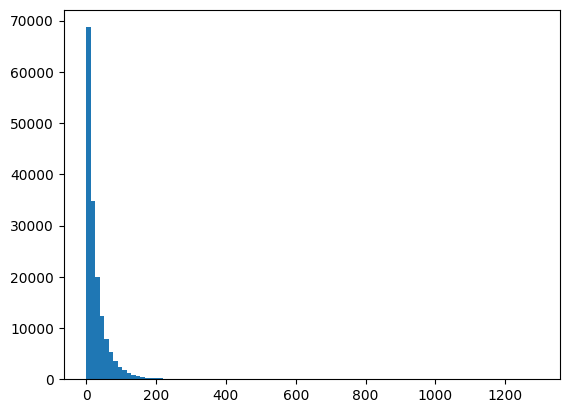

In [30]:
plt.hist(data["usefulCount"],bins=100)

### Normalization

In [31]:
scale=MinMaxScaler()
main_data["usefulCount"]=scale.fit_transform(main_data[["usefulCount"]])

In [32]:
main_data

,drugName,condition,review,rating,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,0.076736
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,0.004263
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,0.004263
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,0.034105
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,0.235893
...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,0.055421
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,0.035526
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,0.066789
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,0.046894


### Encoding

In [33]:
encode=pd.get_dummies(main_data["condition"],dtype=int)

In [34]:
main_data=pd.concat([main_data,encode],axis=1)

In [35]:
main_data.drop(["condition"],axis=1,inplace=True)

In [36]:
encoder=LabelEncoder()
main_data["drugName"]=encoder.fit_transform(main_data["drugName"])

In [37]:
main_data

,drugName,review,rating,usefulCount,Depression,"Diabetes, Type 2",High Blood Pressure
0,173,"""I have taken anti-depressants for years, with...",10.0,0.076736,1,0,0
1,275,"""1 week on Zoloft for anxiety and mood swings....",8.0,0.004263,1,0,0
2,313,"""my gp started me on Venlafaxine yesterday to ...",4.0,0.004263,1,0,0
3,89,"""Hey Guys, It&#039;s been 4 months since my l...",10.0,0.034105,0,1,0
4,95,"""This medicine saved my life. I was at my wits...",10.0,0.235893,1,0,0
...,...,...,...,...,...,...,...
13939,202,"""It is fourth blood pressure pill for me. It f...",4.0,0.055421,0,0,1
13940,55,"""While on Bystolic my feet and arms were numb....",1.0,0.035526,0,0,1
13941,164,"""I just got diagnosed with type 2. My doctor p...",9.0,0.066789,0,1,0
13942,320,"""This is the third med I&#039;ve tried for anx...",2.0,0.046894,1,0,0


### Preprocessing the NLP part

In [38]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
def clean_text(text):

    text = text.translate(str.maketrans("", "", string.punctuation))

    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stopwords.words('english')]

    lemmer=WordNetLemmatizer()
    tokens=[lemmer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [40]:
main_data['Cleaned_review'] = main_data['review'].apply(clean_text)

In [41]:
main_data

,drugName,review,rating,usefulCount,Depression,"Diabetes, Type 2",High Blood Pressure,Cleaned_review
0,173,"""I have taken anti-depressants for years, with...",10.0,0.076736,1,0,0,taken antidepressant year improvement mostly m...
1,275,"""1 week on Zoloft for anxiety and mood swings....",8.0,0.004263,1,0,0,1 week zoloft anxiety mood swing take 50mg mor...
2,313,"""my gp started me on Venlafaxine yesterday to ...",4.0,0.004263,1,0,0,gp started venlafaxine yesterday help depressi...
3,89,"""Hey Guys, It&#039;s been 4 months since my l...",10.0,0.034105,0,1,0,hey guy it039s 4 month since last post wanted ...
4,95,"""This medicine saved my life. I was at my wits...",10.0,0.235893,1,0,0,medicine saved life wit end antidepressant rea...
...,...,...,...,...,...,...,...,...
13939,202,"""It is fourth blood pressure pill for me. It f...",4.0,0.055421,0,0,1,fourth blood pressure pill feel like partly wo...
13940,55,"""While on Bystolic my feet and arms were numb....",1.0,0.035526,0,0,1,bystolic foot arm numb blood sugar became seve...
13941,164,"""I just got diagnosed with type 2. My doctor p...",9.0,0.066789,0,1,0,got diagnosed type 2 doctor prescribed invokan...
13942,320,"""This is the third med I&#039;ve tried for anx...",2.0,0.046894,1,0,0,third med i039ve tried anxiety mild depression...


## WordPlot

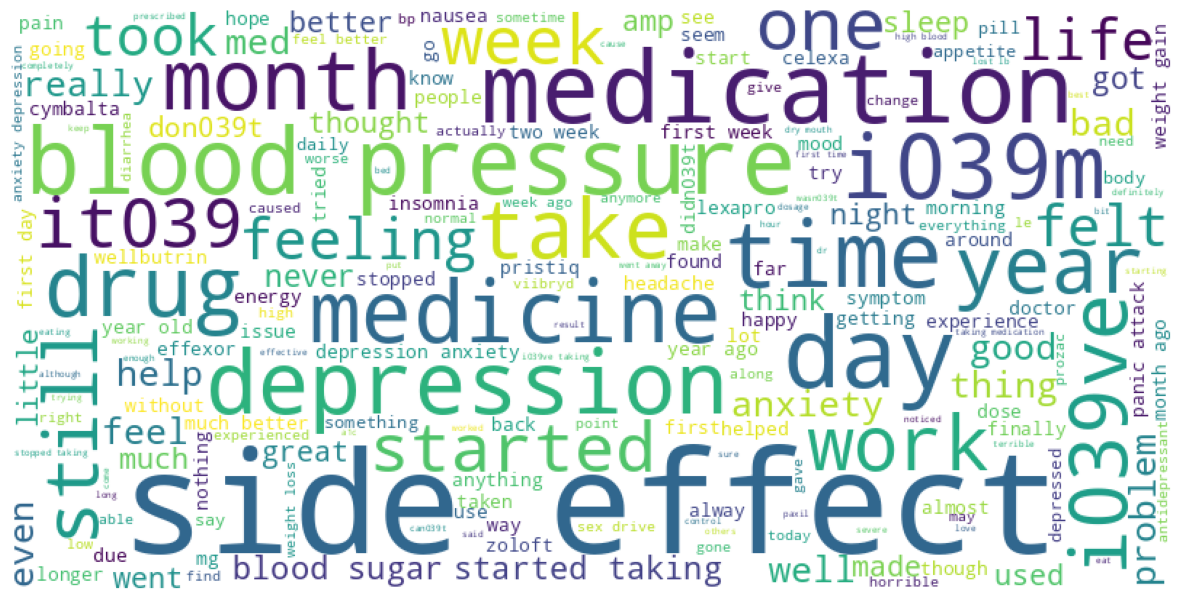

In [42]:
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(" ".join(main_data["Cleaned_review"]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
vectorizer = TfidfVectorizer(min_df=0.07, max_df=0.65)
tfidf_matrix = vectorizer.fit_transform(main_data['Cleaned_review'])


In [44]:
tfidf_matrix

<13944x92 sparse matrix of type '<class 'numpy.float64'>'
	with 181103 stored elements in Compressed Sparse Row format>

In [45]:
main_data=pd.concat([main_data,pd.DataFrame(tfidf_matrix.toarray())],axis=1)

In [46]:
main_data.drop(["review","Cleaned_review"],axis=1,inplace=True)

In [47]:
main_data

,drugName,rating,usefulCount,Depression,"Diabetes, Type 2",High Blood Pressure,0,1,2,3,...,82,83,84,85,86,87,88,89,90,91
0,173,10.0,0.076736,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.169655
1,275,8.0,0.004263,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.390233,0.000000,0.0,0.273419,0.000000,0.0,0.000000,0.000000
2,313,4.0,0.004263,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.152337,0.000000
3,89,10.0,0.034105,0,1,0,0.0,0.0,0.0,0.000000,...,0.0,0.177825,0.119033,0.321758,0.0,0.000000,0.148901,0.0,0.000000,0.000000
4,95,10.0,0.235893,1,0,0,0.0,0.0,0.0,0.189699,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.408948,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,202,4.0,0.055421,0,0,1,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
13940,55,1.0,0.035526,0,0,1,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.285538,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
13941,164,9.0,0.066789,0,1,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.228881,0.309342,0.0,0.320734,0.000000,0.0,0.000000,0.000000
13942,320,2.0,0.046894,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.268562,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [51]:
temp=main_data.iloc[:,:6]

In [52]:
temp.corr()

,drugName,rating,usefulCount,Depression,"Diabetes, Type 2",High Blood Pressure
drugName,1.000000,-0.001221,0.033288,0.157793,-0.057374,-0.142425
rating,-0.001221,1.000000,0.251678,0.100588,-0.037058,-0.090289
usefulCount,0.033288,0.251678,1.000000,0.131602,-0.161659,-0.000603
Depression,0.157793,0.100588,0.131602,1.000000,-0.645864,-0.609496
"Diabetes, Type 2",-0.057374,-0.037058,-0.161659,-0.645864,1.000000,-0.211606
High Blood Pressure,-0.142425,-0.090289,-0.000603,-0.609496,-0.211606,1.000000


## HeatMap

<Axes: >

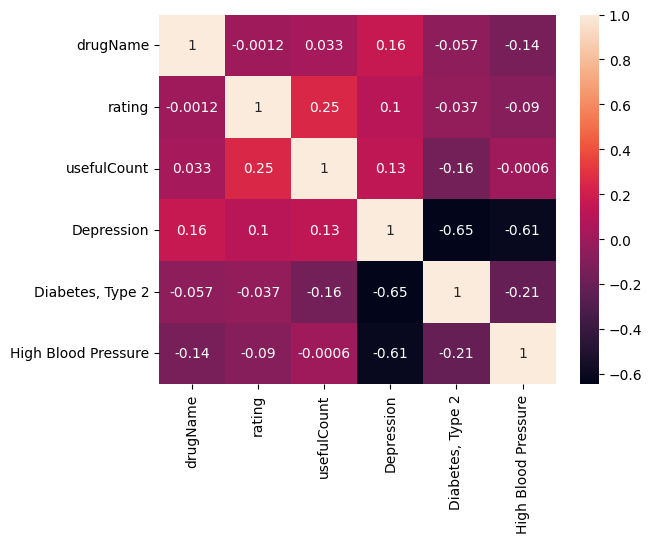

In [53]:
sns.heatmap(temp.corr(),annot=True)

In [54]:
main_data

,drugName,rating,usefulCount,Depression,"Diabetes, Type 2",High Blood Pressure,0,1,2,3,...,82,83,84,85,86,87,88,89,90,91
0,173,10.0,0.076736,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.169655
1,275,8.0,0.004263,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.390233,0.000000,0.0,0.273419,0.000000,0.0,0.000000,0.000000
2,313,4.0,0.004263,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.152337,0.000000
3,89,10.0,0.034105,0,1,0,0.0,0.0,0.0,0.000000,...,0.0,0.177825,0.119033,0.321758,0.0,0.000000,0.148901,0.0,0.000000,0.000000
4,95,10.0,0.235893,1,0,0,0.0,0.0,0.0,0.189699,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.408948,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,202,4.0,0.055421,0,0,1,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
13940,55,1.0,0.035526,0,0,1,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.285538,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
13941,164,9.0,0.066789,0,1,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.228881,0.309342,0.0,0.320734,0.000000,0.0,0.000000,0.000000
13942,320,2.0,0.046894,1,0,0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.268562,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
